In [322]:
import numpy as np

def AIS(MaxItr=50, cloneNum=10, popSize=10, dim = 10, LB = -10, UB = 10, Function= None):
    # Generate initial population
    population = np.random.uniform(LB, UB, (popSize, dim))
    evaluations = np.array([Function(ind) for ind in population])
    
    # Elitism: Track best solution
    best_eval = np.min(evaluations)
    best_sol = np.copy(population[np.argmin(evaluations)])
    convergenceCurve = np.array([best_eval])
    numOfRemoved = int(np.floor(1 * popSize))
    # Main AIS loop
    for itr in range(MaxItr):
        # Clone and mature each solution
        alpha = itr / MaxItr
        for i, individual in enumerate(population):
            cloned_ind = np.copy(individual)
            for j in range(cloneNum):
                
                # alpha = np.random.uniform()
                # Generate mutated clones
                
                # np.sqrt((best_sol - individual)**2)
                # cloned_ind +=  alpha * (best_sol - individual)
                cloned_ind =  cloned_ind + alpha * (best_sol - population[i])
                # dist = np.sqrt((cloned_ind - cloned_ind1)**2).sum()

                cloned_eval = fn(cloned_ind)
                # Update if clone is better
                if cloned_eval <= evaluations[i]:
                    population[i] = cloned_ind
                    evaluations[i] = cloned_eval
                
                # Update global best
                if cloned_eval <= best_eval:
                    best_eval = cloned_eval
                    best_sol = np.copy(cloned_ind)
        convergenceCurve = np.append(convergenceCurve, best_eval) 
                                       

        # Replace weakest solutions to maintain diversity
        # population = population[np.argsort(evaluations)][:-numOfRemoved]
        # cnt = population.shape[0]
        # for k in range(numOfRemoved):
        #     newSol = np.random.uniform(LB, UB, dim)
        #     newSolEval = fn(newSol)
        #     population = np.vstack([population,newSol])
        #     evaluations[cnt] = fn(population[-1])
        #     cnt += 1
        population = np.random.uniform(LB, UB, (popSize, dim))
        evaluations = np.array([Function(ind) for ind in population])



    return best_eval, best_sol, convergenceCurve


In [ ]:
from testFunctions import *
import matplotlib.pyplot as plt


In [306]:
fn = lambda x:rastrigin(x)

In [262]:
fn = lambda x:(x**2).sum()

1697.3851132323957


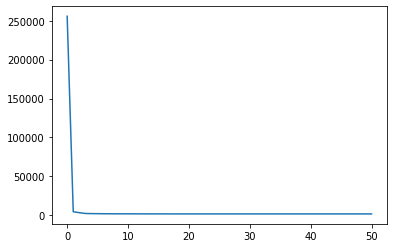

In [323]:

sol = AIS(MaxItr=50, cloneNum=100, popSize=100, dim=100, LB=-100, UB=100, Function=fn)
print(sol[0])
plt.plot(sol[2])

In [305]:
fn

<function __main__.<lambda>(x)>

In [67]:
x = np.random.uniform(-5, 5, (3, 5))

In [123]:
fn = lambda x: (x**2).sum()

In [25]:
from testFunctions import *

In [170]:
fn = lambda x:rastrigin(x)
# fn = lambda x: (x**2).sum()

In [104]:
fn(np.zeros(100))

4.440892098500626e-16

In [166]:
import matplotlib.pyplot as plt

1706.2370362199797


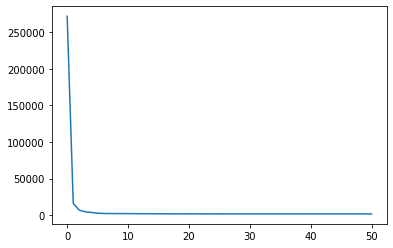

In [192]:
sol = AIS(MaxItr=50, cloneNum=50, popSize=50, dim=100, LB=-100, UB=100, Function=fn)
print(sol[0])
plt.plot(sol[2])

In [176]:
AIS(MaxItr=100, cloneNum=10, popSize=50, dim=100, LB=-100, UB=100, Function=fn)[0]

1536.3887449415342